In [1]:

%matplotlib inline
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools
import brian2 as b2


In [2]:
import numpy as np
import pandas as pd


In [3]:
print(b2.defaultclock.dt)
b2.defaultclock.dt = 0.25 *b2.ms
print(b2.defaultclock.dt)

50. us
250. us


INFO       width adjusted from 1. ms to 1.25 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

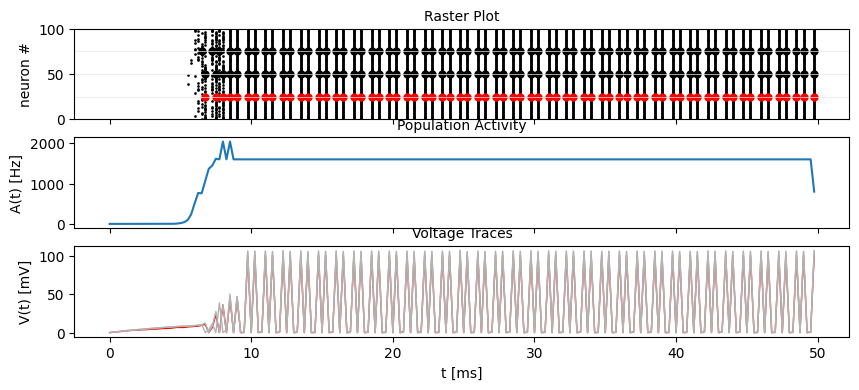

In [4]:
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(
    synaptic_delay = 0.9 * b2.ms,
    abs_refractory_period = 0.0 * b2.ms,

    N_Excit= 10_000,
    N_Inhib=  2_500,
    N_extern= 1_000,
    g=0, poisson_input_rate=20 *b2.Hz,
    sim_time=50. * b2.ms,

    membrane_time_scale= 10.0 *b2.ms,
    firing_threshold= 10.0 *b2.mV,
    v_reset= 0.0 *b2.mV,
)
plot_tools.plot_network_activity(
    rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx,
    t_min=0.*b2.ms,
)


In [5]:
st = spike_monitor.spike_trains()
st_df = pd.DataFrame(data={
    i: st[i][-20:]
    for i in spike_monitor.record
}, index=range(-20, 0))

In [6]:
uvs = pd.Series( np.array([st_df[c].values[1:]-st_df[c].values[:-1] for c in st_df.columns]).ravel() ).value_counts()
uvs

0.00075    1000
0.00050     800
0.00050     100
dtype: int64

In [7]:
uvs.index[1:] - uvs.index[:-1]

Float64Index([-0.0002500000000000002, -6.938893903907228e-18], dtype='float64')

In [8]:
st_df

,10247,1920,2964,8516,6625,7568,5165,453,6696,6288,...,1093,9260,1691,4744,8806,6229,11903,7636,7866,8661
-20,0.03775,0.03775,0.03775,0.03775,0.03775,0.03775,0.03775,0.03775,0.03775,0.03775,...,0.03775,0.03775,0.03775,0.03775,0.03775,0.03775,0.03775,0.03775,0.03775,0.03775
-19,0.03850,0.03850,0.03850,0.03850,0.03850,0.03850,0.03850,0.03850,0.03850,0.03850,...,0.03850,0.03850,0.03850,0.03850,0.03850,0.03850,0.03850,0.03850,0.03850,0.03850
-18,0.03900,0.03900,0.03900,0.03900,0.03900,0.03900,0.03900,0.03900,0.03900,0.03900,...,0.03900,0.03900,0.03900,0.03900,0.03900,0.03900,0.03900,0.03900,0.03900,0.03900
-17,0.03975,0.03975,0.03975,0.03975,0.03975,0.03975,0.03975,0.03975,0.03975,0.03975,...,0.03975,0.03975,0.03975,0.03975,0.03975,0.03975,0.03975,0.03975,0.03975,0.03975
-16,0.04025,0.04025,0.04025,0.04025,0.04025,0.04025,0.04025,0.04025,0.04025,0.04025,...,0.04025,0.04025,0.04025,0.04025,0.04025,0.04025,0.04025,0.04025,0.04025,0.04025
-15,0.04100,0.04100,0.04100,0.04100,0.04100,0.04100,0.04100,0.04100,0.04100,0.04100,...,0.04100,0.04100,0.04100,0.04100,0.04100,0.04100,0.04100,0.04100,0.04100,0.04100
-14,0.04150,0.04150,0.04150,0.04150,0.04150,0.04150,0.04150,0.04150,0.04150,0.04150,...,0.04150,0.04150,0.04150,0.04150,0.04150,0.04150,0.04150,0.04150,0.04150,0.04150
-13,0.04225,0.04225,0.04225,0.04225,0.04225,0.04225,0.04225,0.04225,0.04225,0.04225,...,0.04225,0.04225,0.04225,0.04225,0.04225,0.04225,0.04225,0.04225,0.04225,0.04225
-12,0.04275,0.04275,0.04275,0.04275,0.04275,0.04275,0.04275,0.04275,0.04275,0.04275,...,0.04275,0.04275,0.04275,0.04275,0.04275,0.04275,0.04275,0.04275,0.04275,0.04275
-11,0.04350,0.04350,0.04350,0.04350,0.04350,0.04350,0.04350,0.04350,0.04350,0.04350,...,0.04350,0.04350,0.04350,0.04350,0.04350,0.04350,0.04350,0.04350,0.04350,0.04350
